In [3]:
import pymc as pm
import numpy as np
import pandas as pd
import arviz as az
from matplotlib import pyplot as plt

In [4]:
scorecard = pd.read_csv("combined_scorecard_data.csv")

features = [
    "INSTNM",
    "Year",
    "REGION",
    "CCSIZSET",
    "ADM_RATE",
    "ACTCMMID",
    "SAT_AVG",
    "UGDS",
    "UGDS_WHITE",
    "UGDS_BLACK",
    "UGDS_HISP",
    "UGDS_ASIAN",
    "TUITIONFEE_IN",
    "TUITIONFEE_OUT",
    "C150_4",
    "RET_FT4",
    "UGDS_MEN",
    "UGDS_WOMEN",
    "MDCOST_ALL"
]

scorecard_data = scorecard[features]
scorecard_data

,INSTNM,Year,REGION,CCSIZSET,ADM_RATE,ACTCMMID,SAT_AVG,UGDS,UGDS_WHITE,UGDS_BLACK,UGDS_HISP,UGDS_ASIAN,TUITIONFEE_IN,TUITIONFEE_OUT,C150_4,RET_FT4,UGDS_MEN,UGDS_WOMEN,MDCOST_ALL
0,University of Alabama at Birmingham,1996,5,NaN,NaN,NaN,NaN,9889.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.4322,0.5678,NaN
1,The University of Alabama,1996,5,NaN,NaN,NaN,NaN,13948.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.4767,0.5233,NaN
2,Auburn University,1996,5,NaN,NaN,NaN,NaN,18337.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.5207,0.4793,NaN
3,University of South Alabama,1996,5,NaN,NaN,NaN,NaN,4777.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.4421,0.5579,NaN
4,Troy University,1996,5,NaN,NaN,NaN,NaN,2495.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.4136,0.5864,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4857,Marquette University,2022,3,17.0,0.8721,NaN,1302.0,7290.0,0.6737,0.0487,0.1565,0.0599,46670.0,46670.0,0.8252,0.8947,0.4410,0.5590,NaN
4858,University of Wisconsin-Madison,2022,3,16.0,0.4906,NaN,1374.0,35184.0,0.6249,0.0225,0.0752,0.0972,10796.0,39427.0,0.8923,0.9433,0.4692,0.5308,NaN
4859,University of Wyoming,2022,7,16.0,0.9598,NaN,NaN,8363.0,0.7790,0.0103,0.0838,0.0122,6621.0,21771.0,0.6088,0.7540,0.4686,0.5314,NaN
4860,Stanford University,2022,8,17.0,0.0368,NaN,1553.0,7761.0,0.2589,0.0737,0.1758,0.2635,58416.0,58416.0,0.9511,0.9831,0.4824,0.5176,NaN


In [5]:
football_records = pd.read_csv("college_football_records.csv")
football_records = football_records[['year', 'won', 'lost', 'scorecard_name']]
football_records['WINPERC'] = football_records['won'] / (football_records['won'] + football_records['lost'])

merged = pd.merge(scorecard_data, football_records, right_on=['year', 'scorecard_name'], left_on=['Year', 'INSTNM'])

after2010 = merged.loc[np.where(merged['year'] >= 2010)]
after2010

,INSTNM,Year,REGION,CCSIZSET,ADM_RATE,ACTCMMID,SAT_AVG,UGDS,UGDS_WHITE,UGDS_BLACK,...,C150_4,RET_FT4,UGDS_MEN,UGDS_WOMEN,MDCOST_ALL,year,won,lost,scorecard_name,WINPERC
2134,University of Alabama at Birmingham,2010,5,NaN,0.8243,24.0,1108.0,10661.0,0.6036,0.2673,...,0.4108,0.7997,0.4170,0.5830,NaN,2010,4.0,8.0,University of Alabama at Birmingham,0.333333
2135,The University of Alabama,2010,5,NaN,0.5358,26.0,1155.0,24376.0,0.8183,0.1218,...,0.6726,0.8483,0.4763,0.5237,NaN,2010,10.0,3.0,The University of Alabama,0.769231
2136,Auburn University,2010,5,NaN,0.7867,27.0,1221.0,20221.0,0.8532,0.0783,...,0.6644,0.8745,0.5142,0.4858,NaN,2010,14.0,0.0,Auburn University,1.000000
2137,University of South Alabama,2010,5,NaN,0.8645,22.0,1010.0,11536.0,0.6470,0.1982,...,0.3631,0.6566,0.4314,0.5686,NaN,2010,10.0,0.0,University of South Alabama,1.000000
2138,Troy University,2010,5,NaN,0.6951,21.0,970.0,22045.0,0.4517,0.4107,...,0.3345,0.7291,0.3866,0.6134,NaN,2010,8.0,5.0,Troy University,0.615385
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4219,West Virginia University,2022,5,16.0,0.8838,NaN,1116.0,18370.0,0.8158,0.0317,...,0.6212,0.7899,0.4858,0.5142,NaN,2022,5.0,7.0,West Virginia University,0.416667
4220,University of Wisconsin-Madison,2022,3,16.0,0.4906,NaN,1374.0,35184.0,0.6249,0.0225,...,0.8923,0.9433,0.4692,0.5308,NaN,2022,7.0,6.0,University of Wisconsin-Madison,0.538462
4221,University of Wyoming,2022,7,16.0,0.9598,NaN,NaN,8363.0,0.7790,0.0103,...,0.6088,0.7540,0.4686,0.5314,NaN,2022,7.0,6.0,University of Wyoming,0.538462
4222,Stanford University,2022,8,17.0,0.0368,NaN,1553.0,7761.0,0.2589,0.0737,...,0.9511,0.9831,0.4824,0.5176,NaN,2022,3.0,9.0,Stanford University,0.250000


In [6]:
after2010[['ACTCMMID', 'SAT_AVG']].corr()

,ACTCMMID,SAT_AVG
ACTCMMID,1.000000,0.975152
SAT_AVG,0.975152,1.000000


In [ ]:
regions = {'region_idx': after2010['REGION'].unique()}

with pm.Model() as model:
    # Saving the observed data
    region_idx = pm.MutableData('region_idx', after2010['REGION'], dims='obs_id')
    ccsizset_idx = pm.MutableData('ccsizset_idx', after2010['CCSIZSET'], dims='obs_id')
    winperc = pm.MutableData('winperc', after2010['WINPERC'], dims='obs_id')
    act = pm.MutableData('act', after2010['ACTCMMID'], dims='obs_id')
    sat = pm.MutableData('sat', after2010['SAT_AVG'], dims='obs_id')
    ugds = pm.MutableData('ugds', after2010['UGDS'], dims='obs_id')
    white = pm.MutableData('white', after2010['UGDS_WHITE'], dims='obs_id')
    black = pm.MutableData('black', after2010['UGDS_BLACK'], dims='obs_id')
    hisp = pm.MutableData('hisp', after2010['UGDS_HISP'], dims='obs_id')
    asian = pm.MutableData('asian', after2010['UGDS_ASIAN'], dims='obs_id')
    c150_4 = pm.MutableData('c150_4', after2010['C150_4'], dims='obs_id')
    ret_ft4 = pm.MutableData('ret_ft4', after2010['RET_FT4'], dims='obs_id')
    men = pm.MutableData('men', after2010['UGDS_MEN'], dims='obs_id')
    women = pm.MutableData('women', after2010['UGDS_WOMEN'], dims='obs_id')
    mdcost_all = pm.MutableData('mdcost_all', after2010['MDCOST_ALL'], dims='obs_id')
    year = pm.MutableData('year', after2010['Year'], dims='obs_id')
    observed_vars = [region_idx, ccsizset_idx, winperc, act, sat, ugds, white, black, hisp, asian, c150_4, ret_ft4, men, women, mdcost_all, year]
    
    # Priors for Region effects (winperc, act, sat, ugds)
    beta_winperc = pm.Normal('beta_winperc', mu=0, sd=1)
    beta_act = pm.Normal('beta_act', mu=0, sd=1)
    beta_sat = pm.Normal('beta_sat', mu=0, sd=1)

    # Priors for
    
    # Sampling
    trace = pm.sample(1000)


Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>NUTS: [beta_wins, beta_losses, mu_UGDS, mu_ACT, mu_SAT, racial_proportions, ACTCMMID, SAT_AVG]
>Metropolis: [UGDS]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 449 seconds.
/opt/homebrew/lib/python3.10/site-packages/arviz/utils.py:184: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  numba_fn = numba.jit(**self.kwargs)(self.function)
/opt/homebrew/lib/python3.10/site-packages/arviz/stats/diagnostics.py:592: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller t

/opt/homebrew/lib/python3.10/site-packages/arviz/plots/traceplot.py:222: UserWarning: rcParams['plot.max_subplots'] (20) is smaller than the number of variables to plot (6279), generating only 20 plots
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/arviz/utils.py:184: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  numba_fn = numba.jit(**self.kwargs)(self.function)


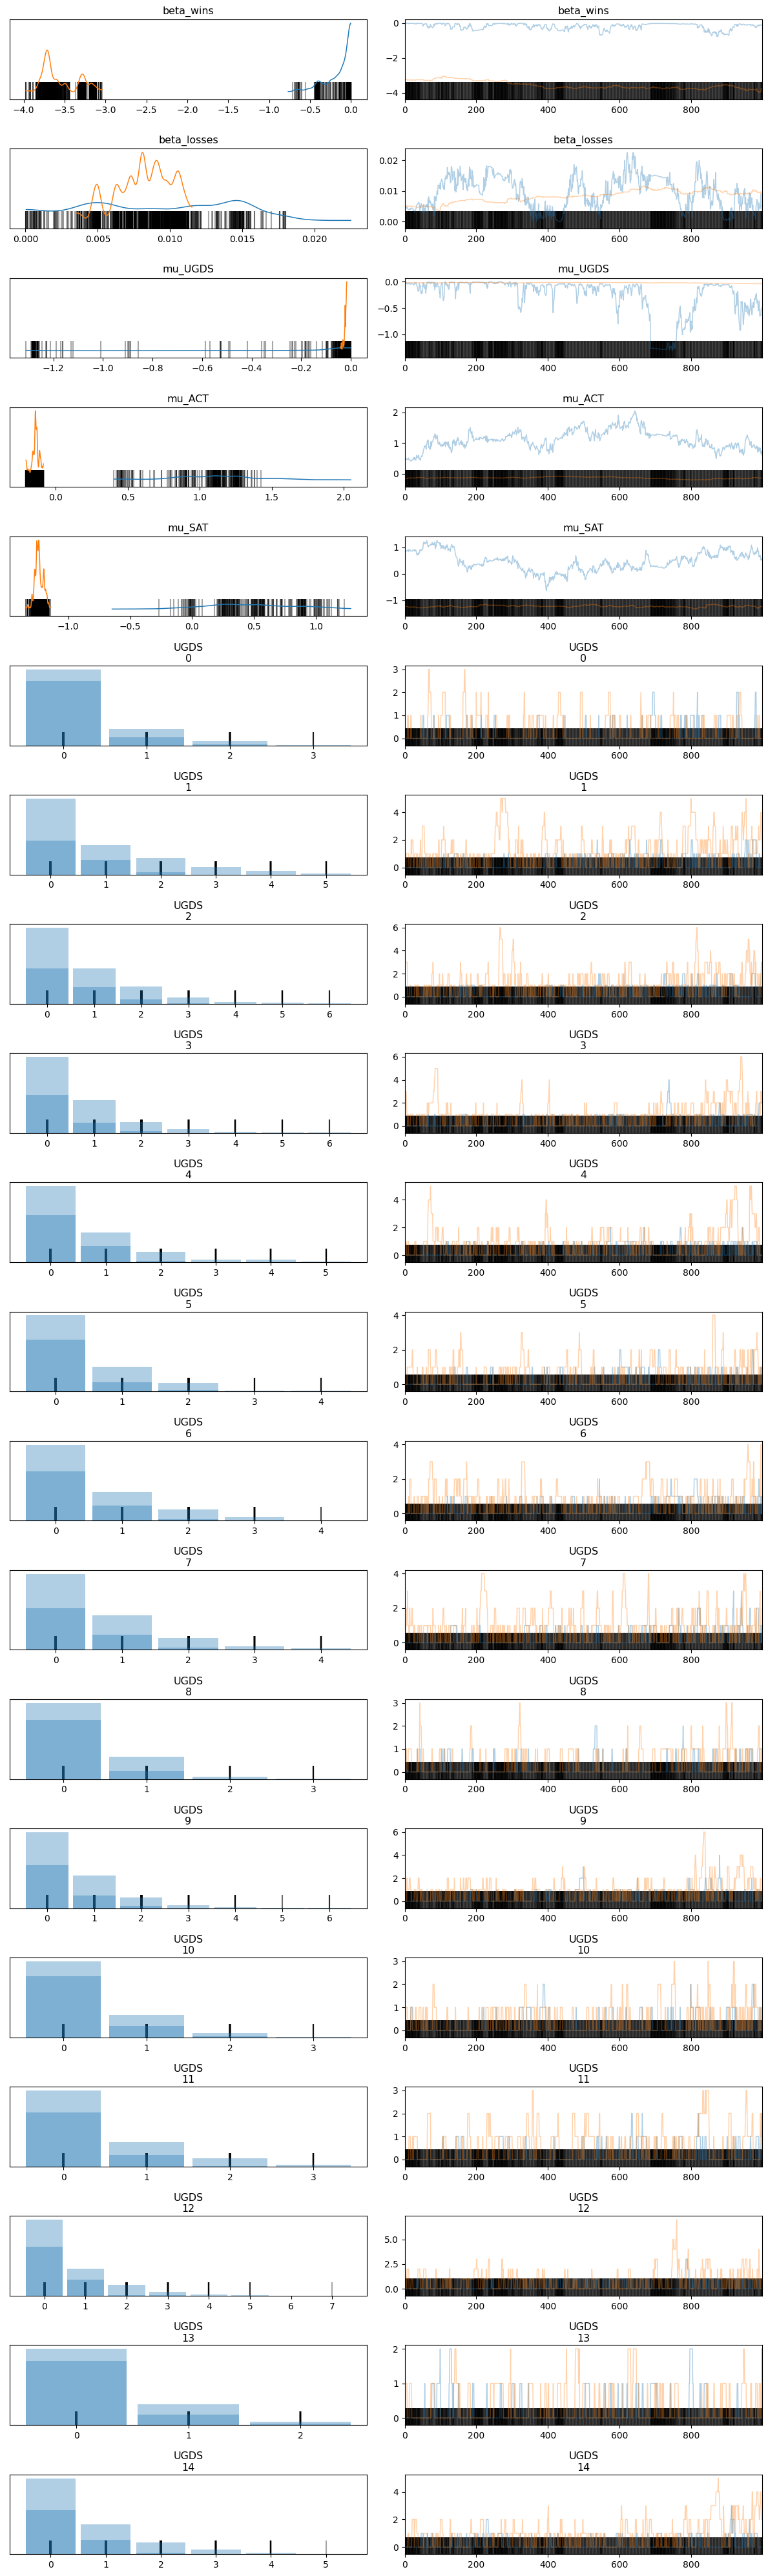

In [19]:
with model:
    az.plot_trace(trace, compact=False)
    plt.tight_layout()

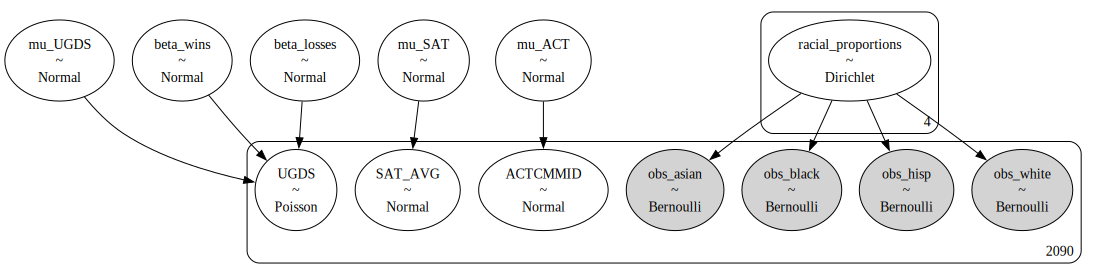

In [21]:
pm.model_to_graphviz(model)